In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [2]:
df1 = pd.read_csv('Car_sales.csv')

In [3]:
#1 read top five values
df1.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [4]:
#2 print dataframe info and data types of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [5]:
#3 print number of rows and colunms
df1.shape

(157, 15)

In [6]:
#4 Drop duplicate rows(if any)
df1 = df1.drop_duplicates()


In [7]:
#5 print number of rows and columns after dropping duplicates
print("rows and columns after dropping duplicates",df1.shape)

rows and columns after dropping duplicates (157, 15)


In [8]:
#6 print summary statistics for numerical variable
df1.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


In [9]:
#7 print number of missing values in each columns
missing_values = df1.isnull().sum()
missing_values

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [10]:
# 8. Drop the column with the most missing values
column_to_drop = missing_values.idxmax()
df = df.drop(columns=[column_to_drop])
print(f"\nDropped column with most missing values: {column_to_drop}")


NameError: name 'df' is not defined

In [12]:
df1.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [ ]:
# Step 9: Drop rows with categorical missing values
categorical_cols = df.select_dtypes(include='object').columns
df = df.dropna(subset=categorical_cols)


In [14]:
# Step 10: Import (display) rows with numerical missing values
numerical_cols = df1.select_dtypes(include=[np.number]).columns
numerical_missing = df1[df1[numerical_cols].isnull().any(axis=1)]
print("Rows with numerical missing values:\n", numerical_missing)

Rows with numerical missing values:
 Empty DataFrame
Columns: [Manufacturer, Model, Sales in thousands, 4-year resale value, Vehicle type, Price in thousands, Engine size, Horsepower, Wheelbase, Width, Length, Curb weight, Fuel capacity, Fuel efficiency, Latest Launch]
Index: []


In [15]:
# Step 11: Sort data w.r.t price and find most/least expensive cars
df1['Price in thousands'] = pd.to_numeric(df1['Price in thousands'], errors='coerce')
df1_sorted = df1.sort_values(by='Price in thousands', ascending=False)
print("Most expensive car:\n", df1_sorted.iloc[0])
print("Least expensive car:\n", df1_sorted.iloc[-1])


Most expensive car:
 Manufacturer               Mercedes-Benz
Model                  CL500            
Sales in thousands                 0.954
4-year resale value                    .
Vehicle type                   Passenger
Price in thousands                  85.5
Engine size                            5
Horsepower                           302
Wheelbase                          113.6
Width                               73.1
Length                             196.6
Curb weight                        4.115
Fuel capacity                       23.2
Fuel efficiency                       20
Latest Launch                   4-Nov-15
Name: 99, dtype: object
Least expensive car:
 Manufacturer               Chrysler     
Model                  Town & Country   
Sales in thousands                 53.48
4-year resale value                19.54
Vehicle type                         Car
Price in thousands                   NaN
Engine size                            .
Horsepower                     

In [16]:
# Step 12: Function to find min and max of any column
def find_min_max(column):
    return df1[column].min(), df1[column].max()

In [17]:
# Step 13: Call function
print("Horsepower:", find_min_max('Horsepower'))
print("Length:", find_min_max('Length'))
print("Fuel efficiency:", find_min_max('Fuel efficiency'))


Horsepower: ('.', '92')
Length: ('.', '224.5')
Fuel efficiency: ('.', '45')


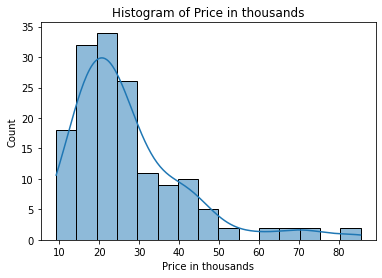

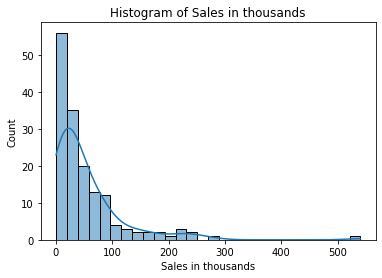

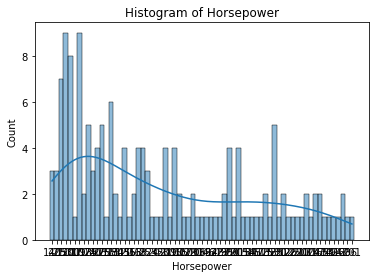

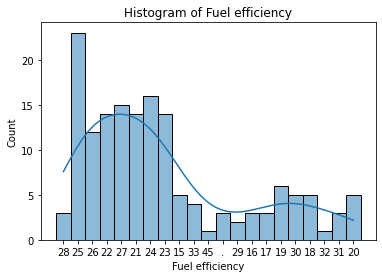

In [18]:
# Step 14: Histograms
for col in ['Price in thousands', 'Sales in thousands', 'Horsepower', 'Fuel efficiency']:
    plt.figure()
    sns.histplot(df1[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

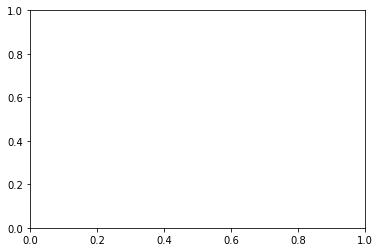

In [19]:
# Step 15: Probability density of Length
plt.figure()
sns.kdeplot(df1['Length'].dropna())
plt.title('Probability Density of Length')
plt.show()

In [20]:
# Step 16: Count by category – group by manufacturer
print(df1['Manufacturer'].value_counts())

Manufacturer
Ford             11
Dodge            11
Chevrolet         9
Mercedes-Benz     9
Toyota            9
Chrysler          7
Mitsubishi        7
Nissan            7
Mercury           6
Oldsmobile        6
Lexus             6
Pontiac           6
Volvo             6
Volkswagen        6
Cadillac          5
Honda             5
Saturn            5
Plymouth          4
Buick             4
Acura             4
Audi              3
BMW               3
Lincoln           3
Porsche           3
Jeep              3
Hyundai           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: count, dtype: int64


In [21]:
# Step 17: Select all numerical variables
numerical_df1 = df1.select_dtypes(include=[np.number])
print("Numerical variables:\n", numerical_df1.columns.tolist())

Numerical variables:
 ['Sales in thousands', 'Price in thousands']


In [22]:
# Step 18: Correlation between price and sales
corr = df1['Price in thousands'].corr(df1['Sales in thousands'])
print(f"Correlation coefficient between Price and Sales: {corr:.2f}")


Correlation coefficient between Price and Sales: -0.30


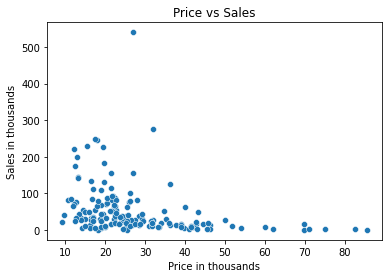

In [23]:
# Step 19: Scatterplot of price vs sales
plt.figure()
sns.scatterplot(x='Price in thousands', y='Sales in thousands', data=df1)
plt.title('Price vs Sales')
plt.show()

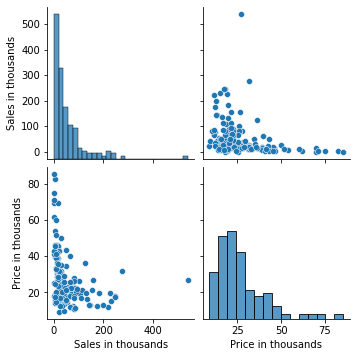

In [24]:
# Step 20: Pair plot
sns.pairplot(df1[numerical_df1.columns])
plt.show()

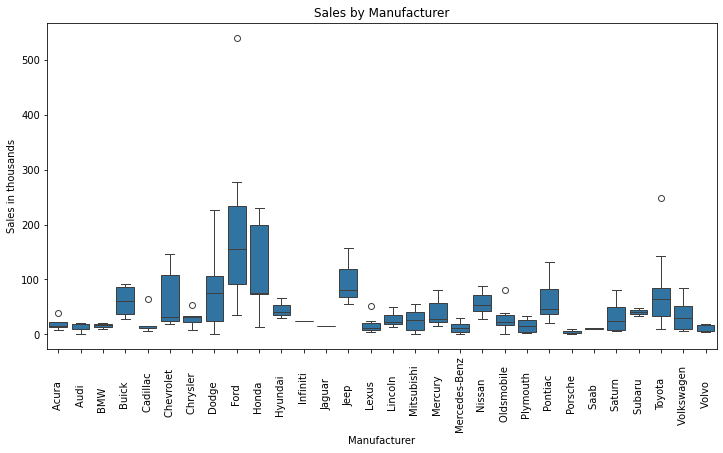

In [25]:
# Step 21: Boxplot of sales by manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Sales in thousands', data=df1)
plt.xticks(rotation=90)
plt.title('Sales by Manufacturer')
plt.show()

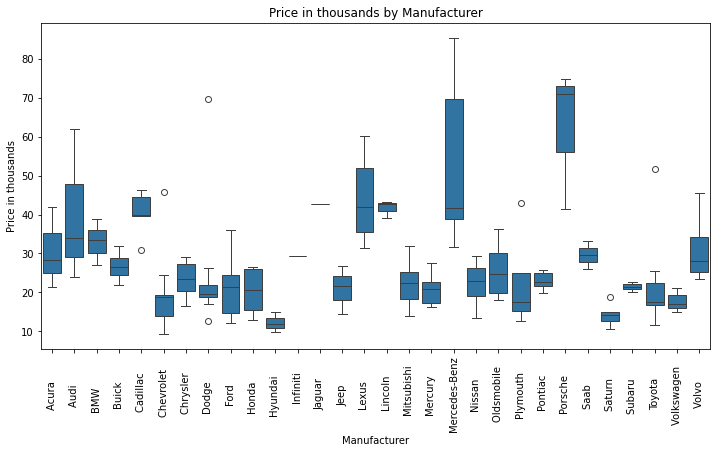

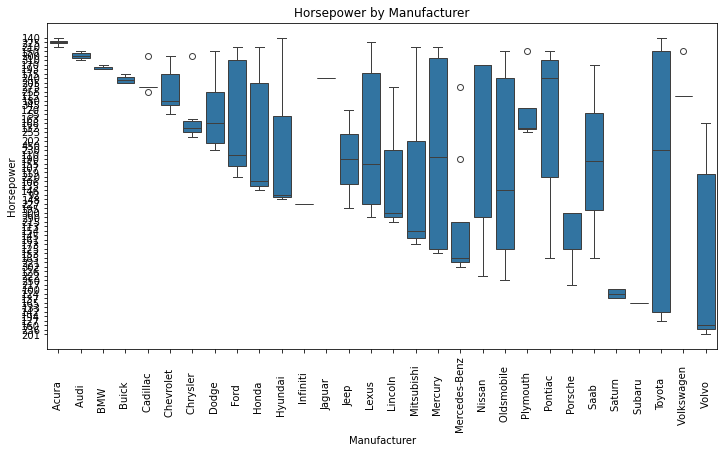

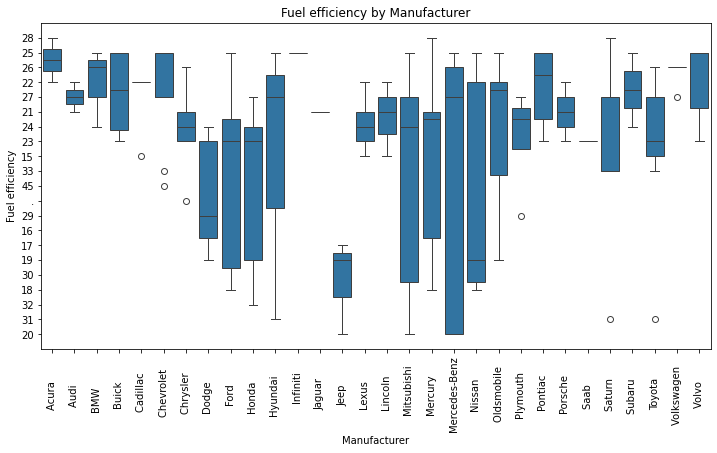

In [26]:
# Step 22: Boxplot of other numerical vars w.r.t manufacturer
for col in ['Price in thousands', 'Horsepower', 'Fuel efficiency']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Manufacturer', y=col, data=df1)
    plt.xticks(rotation=90)
    plt.title(f'{col} by Manufacturer')
    plt.show()

In [27]:
# Step 23: Divide into X (features) and y (sales)
X = df1.drop(columns=['Sales in thousands'])
y = df1['Sales in thousands']

In [28]:

# Step 24: Label encode categorical variables
label_enc = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    if col != 'Vehicle type':
        X[col] = label_enc.fit_transform(X[col])

In [29]:
# Step 25: One-hot encode Vehicle type
X = pd.get_dummies(X, columns=['Vehicle type'])

In [30]:
# Step 26: Split into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
# Step 27: Apply feature scaling on numerical variables
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test[X_test.select_dtypes(include=[np.number]).columns] = scaler.transform(X_test.select_dtypes(include=[np.number]))
